https://github.com/ktreider/CS260





In [ ]:
# imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
plt.style.use('fivethirtyeight') #A helpful style package
import plotly.graph_objects as go
import seaborn as sns

---
#### CS 260 Final Project - Spring 2022
---

# Touching the Peak ⛰️

### By: Katie Reider & HB


---

## 1. Introduction

For this project, our group will explore... what factors lead to a successful climbing expedition?

We plan to ask these questions.  

* 1. (expedition csv) Do member deaths or hired staff deaths correlate to any specific trekking agency?
<br><br>
* 2. (peaks csv) Is there a relationship between the height of the peak and the year it was successfully ascended?
<br><br>
* 3. (Members csv) **Were those that were injured on their expedition younger or older than the uninjured?**
<br><br>
4. (Expedition csv) Is there a correlation between the date the highpoint was reached and the termination date for each termination reason? 
<br><br>
* 5. (Expedition csv) Were there more successful termination reasons in a particular season?
<br><br>
* 6. (Members csv) **Did more men or women successfully climb a peak?**
<br><br>
* 7. (Expedition csv) Were there more member deaths if the number of members on an expedition was higher/lower? 
<br><br>
* 8. (Expedition csv) Did member deaths increase/decrease if there were hired staff on the expedition?
<br><br>
* 9. (Peaks) Which peaks had the highest success rate, which had the lowest?
<br><br>

---
---

## 2. Data

A direct link to the data on climbing expeditions can be found at the following website. 
 * https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-09-22
 * https://www.himalayandatabase.com/
 
According to this website, the Database is "a complication of records for all expeditions that have climbed in the Nepal Himalaya." The data is gathered from books, alpine journals, and correspondence with Himalayan climbers. The data below covers expeditions from 1905 through early 2020, but the Himalayan Database continually updates.

In [ ]:
url = "https://raw.githubusercontent.com/ktreider/CS260/main/expeditions.csv"
expeditions = pd.read_csv(url)
expeditions.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN


In [ ]:
url2 = "https://raw.githubusercontent.com/ktreider/CS260/main/members.csv"
members = pd.read_csv(url2)
members.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
url3 = "https://raw.githubusercontent.com/ktreider/CS260/main/peaks.csv"
peaks = pd.read_csv(url3)
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


In [ ]:
#merged tables here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
merge1 =  expeditions.merge(members, how="left", on=['expedition_id', 'peak_id', 'peak_name', 'year', 'season', 'highpoint_metres', 'oxygen_used'])
merge1.columns

total_climbs = peaks.merge(merge1, how="left", left_on=['first_ascent_expedition_id', 'peak_name', 'peak_id'], right_on=['expedition_id', 'peak_name', 'peak_id'])
total_climbs.columns

Index(['peak_id', 'peak_name', 'peak_alternative_name', 'height_metres',
       'climbing_status', 'first_ascent_year', 'first_ascent_country',
       'first_ascent_expedition_id', 'expedition_id', 'year', 'season',
       'basecamp_date', 'highpoint_date', 'termination_date',
       'termination_reason', 'highpoint_metres', 'members', 'member_deaths',
       'hired_staff', 'hired_staff_deaths', 'oxygen_used', 'trekking_agency',
       'member_id', 'sex', 'age', 'citizenship', 'expedition_role', 'hired',
       'success', 'solo', 'died', 'death_cause', 'death_height_metres',
       'injured', 'injury_type', 'injury_height_metres'],
      dtype='object')

---
---
### 2.1 Variables Explained

Below is a list of each variable in the dataset and its explanation.
#### TABLE: EXPEDITIONS 
| variable           | class     | description                                                  |
| :----------------- | :-------- | :----------------------------------------------------------- |
| expedition_id      | character | Unique identifier for expedition. Can be linked to `peaks` or `members` tables. |
| peak_id            | character | Unique identifier for peak. Can be linked to `peaks` table.  |
| peak_name          | character | Common name for peak                                         |
| year               | double    | Year of expedition (1960 - 2019)                                           |
| season             | character | Season of expedition (Spring, Summer, Winter, Autumn)                  |
| basecamp_date      | date      | Date of expedition arrival at basecamp                       |
| highpoint_date        | date      | Date of expedition summiting the peak for the first time or, if peak wasn't reached, date of reaching its highpoint |
| termination_date   | date      | Date the expedition was terminated                           |
| termination_reason | character | Primary reason the expedition was terminated. There are two possibilities for a successful expeditions, depending on whether the main peak or a sub-peak was summitted. (0-unknown, 1-success main peak, 2-success subpeak, 3-success claimed, 4-bad weather from storms, high winds, 5-bad conditions from deep snow, avalanching, falling ice, or rock, 6-accident like death or serious injury, 7- illness, ams, exhaustion, or frostbite, 8- lack of supplies of equipment, 9-lack of time, 10- route technically too difficult, lack of experience, strenght or motivation, 11-did not reach base camp, 12-did not attempt climb, 13-attempt rumoured, 14-other) |
| highpoint_metres   | double    | Elevation highpoint of the expedition                        |
| members            | double    | Number of expedition members. For expeditions in Nepal, this is usually the number of foreigners listed on the expedition permit. For expeditions in China, this is usually the number of non-hired members. |
| member_deaths      | double    | Number of expeditions members who died                       |
| hired_staff        | double    | Number of hired staff who went above basecamp                |
| hired_staff_deaths | double    | Number of hired staff who died                               |
| oxygen_used        | logical   | Whether oxygen was used by at least one member of the expedition (TRUE or FALSE) |
| trekking_agency    | character | Name of the trekking agency                                  |


#### TABLE: MEMBERS
| variable             | class     | description                                                  |
| :------------------- | :-------- | :----------------------------------------------------------- |
| expedition_id        | character | Unique identifier for expedition. Can be linked to `peaks` or `members` tables. |
| member_id            | character | Unique identifier for the person. This is *not* consistent across expeditions, so you cannot use a single `member_id` to look up all expeditions a person was part of. |
| peak_id              | character | Unique identifier for peak. Can be linked to `peaks` table.  |
| peak_name            | character | Common name for peak                                         |
| year                 | double    | Year of expedition (1978 - 2019)                                          |
| season               | character | Season of expedition (Spring, Summer, Winter, Autumn)                  |
| sex                  | character | Sex of the person (M or F)                                          |
| age                  | double    | Age of the person. Depending on the best available data, this could be as of the summit date, the date of death, or the date of arrival at basecamp. |
| citizenship          | character | Citizenship of the person                                    |
| expedition_role      | character | Role of the person on the expedition (Leader, Climber, Kayaker, etc.)                        |
| hired                | logical   | Whether the person was hired by the expedition (TRUE or FALSE)               |
| highpoint_metres     | double    | Elevation highpoint of the person                            |
| success              | logical   | Whether the person was successful in summitting a main peak or sub-peak, depending on the goal of expedition (TRUE or FALSE) |
| solo                 | logical   | Whether the person attempted a solo ascent                   |
| oxygen_used          | logical   | Whether the person used oxygen (TRUE or FALSE)                              |
| died                 | logical   | Whether the person died TRUE or FALSE)                                      |
| death_cause          | character | Primary cause of death (0-unspecified, 1-AMS, 2-exhaustion, 3-exposure or frostbite, 4-fall, 5-crevasse, 6-icefall collapse, 7-avalanche, 8-falling rock or ice, 9-disappearance (unexplained), 10-illness (non-AMS), 11-other, 12-unknown)                                      |
| death_height_metres  | double    | Height at which the person died                              |
| injured              | logical   | Whether the person was injured TRUE or FALSE)                              |
| injury_type          | character | Primary cause of injury (0-unspecified, 1-AMS, 2-exhaustion, 3-exposure or frostbite, 4-fall, 5-crevasse, 6-icefall collapse, 7-avalanche, 8-falling rock or ice, 9-disappearance (unexplained), 10-illness (non-AMS), 11-other, 12-unknown)                                      |
| injury_height_metres | double    | Height at which the injury occurred                          |

#### TABLE: PEAKS
| variable                   | class     | description                                                  |
| :------------------------- | :-------- | :----------------------------------------------------------- |
| peak_id                    | character | Unique identifier for peak                                   |
| peak_name                  | character | Common name of peak                                          |
| peak_alternative_name      | character | Alternative name of peak (for example, the "Mount Everest" is "Sagarmatha" in Nepalese) |
| height_metres              | double    | Height of peak in metres                                     |
| climbing_status            | character | Whether the peak has been climbed (Climbed or Unclimbed)                            |
| first_ascent_year          | double    | Year of first successful ascent, if applicable               |
| first_ascent_country       | character | Country name(s) of expedition members part of the first ascent. Can have multiple values if members were from different countries. Country name is as of date of ascent (for example, "W Germany" for ascents before 1990). |
| first_ascent_expedition_id | character | Unique identifier for expedition. Can be linked to `expeditions` or `members` tables. |

---
---
## 3. Initial Analysis

<span style="color:red">This is the section where you begin your initial analysis.  For each project update, you will make any changes that I requested to the previous update.  Then you will fill out another sub section. **Read the details in the Project Description about what is expected for each update.**</span>
    
<span style="color:red">During the last two weeks of class, you will rename this section "Analysis" and will merge the subsections to tell a cohesive story.  So this section will develop into your final report.  At that point, you will delete this red comment and the one above. </span>


### 3.1 First Visualizations

---
#### First Visualization

###### **Were those that were injured on their expedition younger or older than the uninjured?**

In [ ]:
not_injured = members[members.injured == False]
injured = members[members.injured == True]

Text(0, 0.5, 'Age')

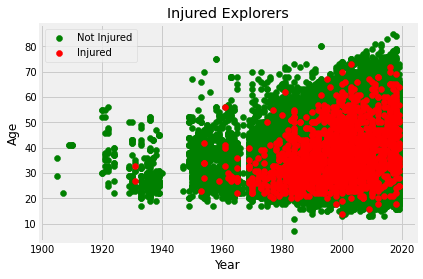

In [ ]:
plt.scatter(not_injured.year, not_injured.age, color="green", label="Not Injured")
plt.scatter(injured.year, injured.age, color="red", label="Injured")
plt.legend(loc=2)
plt.title("Injured Explorers")
plt.xlabel('Year')
plt.ylabel('Age')

In [ ]:
not_injured.age.mean()

37.332221770747225

In [ ]:
injured.age.mean()

37.42398546335554

*From this exploration, there does not seem to be a difference in age depending on whether the person was injured or not. The injured age mean is only ~0.1 higher than that of the non-injured. The thought process behind this is that there might be more injuries if the hiker is older. But this does not seem to be the case. This might be explained based on the type of injury (see below).*

In [ ]:
injured.injury_type.value_counts()

Exposure / frostbite           599
AMS                            415
Illness (non-AMS)              257
Fall                           117
Avalanche                      114
Falling rock / ice              88
Other                           75
Crevasse                        25
Disappearance (unexplained)      8
Icefall collapse                 7
Exhaustion                       7
Name: injury_type, dtype: int64

---
#### Second Visualization

###### **Did more men or women successfully climb a peak?**

In [ ]:
successful_climbs = members[members["success"] == True]
done_trips_per_gender = successful_climbs.groupby("sex").count()[["success"]]
done_trips_per_gender

,success
sex,
F,2306
M,26891


Text(0, 0.5, 'Number of Successful Trips')

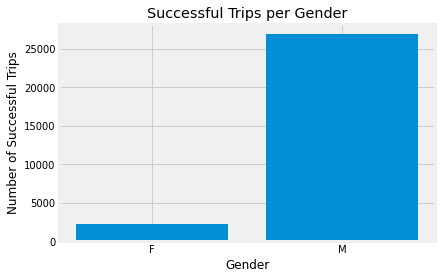

In [ ]:
plt.bar(done_trips_per_gender.index, done_trips_per_gender["success"])
plt.title("Successful Trips per Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Successful Trips")

*After visualizing the data, it is evident that more men successfully climbed a peak than women. There were roughly 26,000 men that completed a climb compared to only about 2300 women who completed their ascent. However, it is essential to look into the fact that there could be an overwhelming number of men who attempted to climb a peak compared to the number of women that tried to climb the peaks. There need to be more visualizations to see the success rate of each gender, showing what percent of that gender successfully climbed a peak.*

---
---
### 3.2 Project Update 2

---
#### First Visualization

##### **Did more men or women successfully climb a peak? -Continued-**

In [ ]:
climbs = members.groupby("sex").count()[["success"]].rename(columns = {"success" : "Number of climbs"})
climbs

,Number of climbs
sex,
F,7044
M,69473


In [ ]:
total_females = climbs.loc['F']["Number of climbs"]
total_males = climbs.loc['M']["Number of climbs"]

In [ ]:
num_f_accomplished = len(members[(members["sex"] == "F") & (members["success"] == True)])
num_f_accomplished

2306

In [ ]:
num_m_accomplished = len(members[(members["sex"] == "M") & (members["success"] == True)])
num_m_accomplished

26891

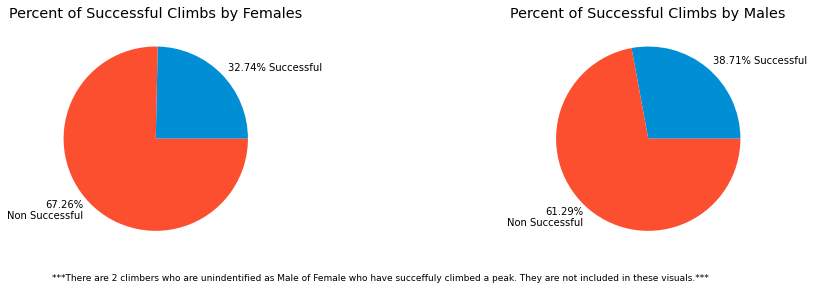

In [ ]:
f_values = '{:.2f}% Successful'.format(num_f_accomplished / total_females * 100), '{:.2f}%\nNon Successful'.format((total_females - num_f_accomplished)/ total_females * 100)
m_values = '{:.2f}% Successful'.format(num_m_accomplished / total_males * 100), '{:.2f}%\nNon Successful'.format((total_males - num_m_accomplished)/ total_males * 100)

#create pie chart of the percent of females that successfully climbed a peak
plt.subplot(1,2,1)
plt.pie([num_f_accomplished, total_females], labels = f_values)
plt.title("Percent of Successful Climbs by Females")

#create pie chart of the percent of males that successfully climbed a peak
plt.subplot(1,2,2)
plt.pie([num_m_accomplished, total_males], labels = m_values)
plt.title("Percent of Successful Climbs by Males")

#Set the spacing of the subplots
plt.subplots_adjust(left = 0.1,bottom = 0.1, right= 2, top = 0.9, wspace =.5, hspace =.5)
plt.figtext(1,.01, 
            "***There are 2 climbers who are unindentified as Male of Female who have succeffuly climbed a peak. They are not included in these visuals.***", 
            fontsize = 9,
            horizontalalignment='center');

*Looking at the proportions of the success rate of a climb per gender, we can see that both males and females have roughly the same chance of successfully climbing a peak. About 32% of females that attempted to climb a peak accomplished it, and about 38% of males accomplished their hike. With this information, we can see that any one gender does not have much of an advantage in successfully climbing a peak.*

---
#### Second Visualization

###### **Is there a relationship between the height of the peak and the year it was successfully ascended?**

*Next, we took a little detour to explore a new type of graph and look at ages across the years*

In [ ]:
years = members['year']
years.sort_values().unique()
years_list = [1930, 1950, 1970, 1990, 2010, 2019] #select some years to look closer at

ages = members[['age', 'year']]
ages = ages[ages['year'].isin(years_list)] #choose the rows only with those years

In [ ]:
#select counts for the ages, but also keep the year. These will help for plotting histogram-like graphs
ages2 = ages.groupby(['year', 'age']).agg({'age':'count'}).rename(columns={'age': 'count'}).reset_index()
ages2.head(5) 

,year,age,count
0,1930,23.0,1
1,1930,24.0,5
2,1930,26.0,1
3,1930,27.0,2
4,1930,28.0,1


In [ ]:
#creation of a ridgeline graph

#store each year's data in a dictionary
array_dict = {}
for year in years_list:
    array_dict[f'x_{year}'] = ages2[ages2['year']==year]['age']
    array_dict[f'y_{year}'] = ages2[ages2['year']==year]['count']
    array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min())
#array_dict

#plot the traces on the graph for each year
fig = go.Figure()
for index, year in enumerate(years_list):
    fig.add_trace(go.Scatter(
                            x = [10, 80], y = np.full(2, len(years_list)- index),
                            mode =  'lines',
                            line_color = 'white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(years_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    fig.add_annotation(
                        x=10,
                        y=len(years_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift= 10)
    
fig.update_layout(
                title='Ages on Expeditions across several years',
                showlegend=False,
                xaxis=dict(title='Age'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

*This is a ridgeline graph showing the distributions of ages across the years. Here we can see that the hikes in 1910 had people as young as 23 and as old as 50. It seems like the most common ages were 24 and 43 for that year. Whereas in 2010, hikes had hikers as young as 13 and up to 79 years old! But, most fell between 24 and 48 years old. Something interesting to note is that there were a lot of people in 1950 who were 51 years old, and then in 1970, the trend seemed to be that younger hikers were on expeditions (22-31 years). So, we can see a whole range of ages hike the Himalayas, which is probably not a factor of success.*

###### **Is there a relationship between the height of the peak and the year it was successfully ascended?**

In [ ]:
years = expeditions['year']
years.sort_values().unique()
years_list = [1970, 1980, 1990, 2000, 2010, 2019]

In [ ]:
heights = expeditions[['highpoint_metres', 'year', 'termination_reason']]
heights = heights[heights.termination_reason.str.contains('Success')] #collect only successful expeditions, gather the highpoint
heights.sort_values('year')
heights = heights[heights['year'].isin(years_list)]
heights.sort_values('year')

,highpoint_metres,year,termination_reason
30,7525.0,1970,Success (main peak)
2355,7219.0,1970,Success (main peak)
2485,8167.0,1970,Success (main peak)
2488,6883.0,1970,Success (main peak)
2489,6920.0,1970,Success (main peak)
...,...,...,...
10244,8850.0,2019,Success (main peak)
10243,8850.0,2019,Success (main peak)
10242,8850.0,2019,Success (main peak)
10240,8850.0,2019,Success (main peak)


In [ ]:
heights_g2 = heights.groupby(['year', 'highpoint_metres']).agg({'highpoint_metres':'count'}).rename(columns={'highpoint_metres': 'count'}).reset_index()
heights_g2

,year,highpoint_metres,count
0,1970,5806.0,1
1,1970,6611.0,1
2,1970,6672.0,1
3,1970,6693.0,1
4,1970,6883.0,1
...,...,...,...
140,2019,8167.0,1
141,2019,8485.0,9
142,2019,8516.0,20
143,2019,8586.0,6


In [ ]:
array_dict = {}
for year in years_list:
    array_dict[f'x_{year}'] = heights_g2[heights_g2['year']==year]['highpoint_metres']
    array_dict[f'y_{year}'] = heights_g2[heights_g2['year']==year]['count']
    array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min())
#array_dict

fig = go.Figure()
for index, year in enumerate(years_list):
    fig.add_trace(go.Scatter(
                            x = [5500, 9000], y = np.full(2, len(years_list)- index),
                            mode =  'lines',
                            line_color = 'white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(years_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    fig.add_annotation(
                        x=5500,
                        y=len(years_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift= 10)
    
fig.update_layout(
                title='Highpoints across several years',
                showlegend=False,
                xaxis=dict(title='The Highpoint in metres'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

*This ridgeline graph shows the distributions of high points of expeditions across the years. There are two major "peaks" in the distributions. This makes sense because there are labeled successes for small peaks and the mountain's central peak being climbed. Thus, the high points typically fall near the 7000-meter height or 9000 meters. All of these heights were reasonably similar across the decades. So is the height related to the year? Not really. Let's take a look at a scatter plot below.*

Text(0, 0.5, 'Height (metres)')

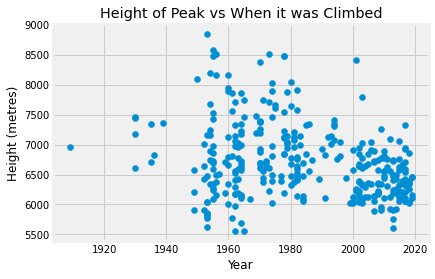

In [ ]:
#or look at scatter
peaks = peaks[peaks.first_ascent_year > 1500] #exclude weird outlier

plt.scatter(peaks.first_ascent_year, peaks.height_metres)
plt.title("Height of Peak vs When it was Climbed")
plt.xlabel("Year")
plt.ylabel("Height (metres)")

In [ ]:
peaks.corr() #-0.3, a slight negative linear correlation.

,height_metres,first_ascent_year
height_metres,1.000000,-0.314535
first_ascent_year,-0.314535,1.000000


---
#### Third Visualization

###### **Do member deaths or hired staff deaths correlate to any specific trekking agency?**


In [ ]:
member_deaths = expeditions[(expeditions["member_deaths"] > 0)]
member_deaths.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
5,ANN280101,ANN2,Annapurna II,1980,Spring,1980-03-25,1980-04-24,1980-05-01,Accident (death or serious injury),7000.0,6,1,2,0,False,NaN
8,ANN281301,ANN2,Annapurna II,1981,Autumn,1981-09-04,1981-10-11,1981-10-17,Accident (death or serious injury),7400.0,9,1,3,0,False,NaN
10,ANN283101,ANN2,Annapurna II,1983,Spring,1983-04-11,1983-05-05,NaN,Accident (death or serious injury),7450.0,5,1,0,0,False,NaN
66,KANG88103,KANG,Kangchenjunga,1988,Spring,1988-03-24,1988-04-15,1988-05-15,"Route technically too difficult, lack of exper...",8450.0,23,1,9,0,True,Lamjung
69,AMAD88102,AMAD,Ama Dablam,1988,Spring,1988-03-23,1988-04-15,1988-04-17,"Bad conditions (deep snow, avalanching, fallin...",6520.0,6,1,0,0,False,Mountain Travel


In [ ]:
staff_deaths = expeditions[(expeditions["hired_staff_deaths"] > 0) & (expeditions["trekking_agency"] != "Sea to Summit Trekking")] # Remove weird outlier (agency has 6 deaths but only hired 3)
staff_deaths.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
42,ANN485301,ANN4,Annapurna IV,1985,Autumn,1985-10-05,1985-10-06,1985-10-25,"Bad conditions (deep snow, avalanching, fallin...",5000.0,15,0,0,1,False,NaN
107,EVER88401,EVER,Everest,1988,Winter,1988-11-10,1988-12-22,NaN,Accident (death or serious injury),8700.0,17,0,10,1,True,Mountain Travel
126,ANN183301,ANN1,Annapurna I,1983,Autumn,1983-08-31,1983-09-11,NaN,Accident (death or serious injury),6700.0,9,1,4,2,False,NaN
136,KTEG83301,KTEG,Kangtega,1983,Autumn,1983-10-04,1983-10-18,1983-10-24,"Route technically too difficult, lack of exper...",6250.0,6,0,4,1,False,NaN
206,MANA85303,MANA,Manaslu,1985,Autumn,1985-09-22,1985-10-22,1985-10-27,Accident (death or serious injury),7200.0,15,0,10,1,False,NaN


In [ ]:
deaths_per_agency = member_deaths.groupby("trekking_agency").sum()[["member_deaths", "members"]]

deaths_per_agency["Percent of Deaths"] = deaths_per_agency["member_deaths"] / deaths_per_agency["members"] * 100

deaths_per_agency = deaths_per_agency.sort_values("member_deaths", ascending = False)
top_deaths = deaths_per_agency.head(10)

top_10_deaths_per_agency = top_deaths.sort_values("Percent of Deaths", ascending = False)
top_10_deaths_per_agency

,member_deaths,members,Percent of Deaths
trekking_agency,,,
Kunga,13,41,31.707317
Cosmo Treks,21,81,25.925926
International Trekkers (Intrek Asia),22,89,24.719101
Trans Himalayan Trekking (THT),14,75,18.666667
Wilderness Experience,15,84,17.857143
Seven Summit Treks,23,132,17.424242
Himalayan Guides,14,89,15.730337
Windhorse Trekking,12,78,15.384615
Asian Trekking,76,568,13.380282


In [ ]:
staff_deaths_per_agency = staff_deaths.groupby("trekking_agency").sum()[["hired_staff_deaths", "hired_staff"]]

staff_deaths_per_agency["Percent of Deaths"] = staff_deaths_per_agency["hired_staff_deaths"] / staff_deaths_per_agency["hired_staff"] * 100

staff_deaths_per_agency = staff_deaths_per_agency.sort_values("hired_staff_deaths", ascending = False)
top_deaths = staff_deaths_per_agency.head(10)

top10_staff_deaths_per_agency = top_deaths.sort_values("Percent of Deaths", ascending = False)
top10_staff_deaths_per_agency

,hired_staff_deaths,hired_staff,Percent of Deaths
trekking_agency,,,
"Unknown, if any",10,10,100.000000
Churen Himal Treks,12,14,85.714286
Thamserku Trekking,8,20,40.000000
Shangri-La Nepal Treks,7,18,38.888889
Cho Oyu Trekking,5,14,35.714286
Sallyan,4,12,33.333333
Himalayan Guides,20,76,26.315789
Windhorse Trekking,8,39,20.512821
Seven Summit Treks,10,52,19.230769


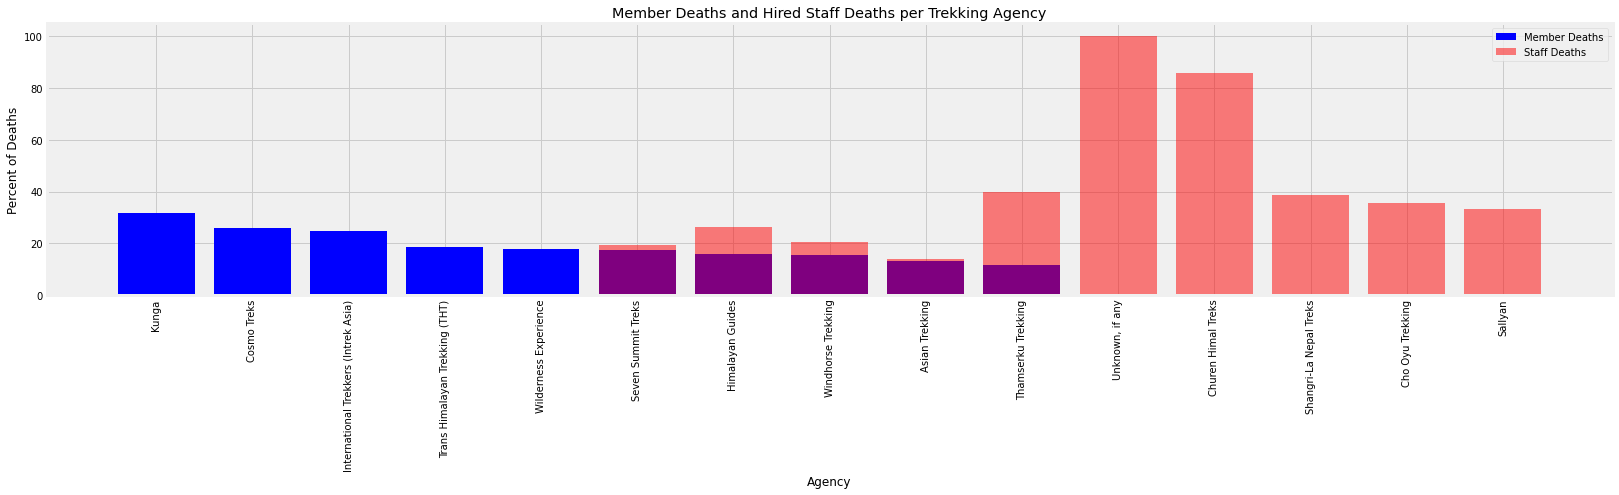

In [ ]:
plt.figure(figsize = (25, 5))
plt.bar(top_10_deaths_per_agency.index, top_10_deaths_per_agency["Percent of Deaths"] , color = "blue", label = "Member Deaths")
plt.bar(top10_staff_deaths_per_agency.index, top10_staff_deaths_per_agency["Percent of Deaths"], color = "red", alpha = .5, label = "Staff Deaths")
plt.title("Member Deaths and Hired Staff Deaths per Trekking Agency")
plt.xticks(rotation = 90)
plt.xlabel("Agency")
plt.ylabel("Percent of Deaths")
plt.legend()

*From this visualization, we can see that the Kunga Trekking company had the most member deaths compared to the other companies. All of the staff that tried the expedition that were not a part of an agency did not make it back. We can infer from this observation that it is best to climb with an agency since the number of deaths per agency is relatively low. A noticeable trend is that there are way more percent of staff deaths than member deaths, and we should do more research to see if we can figure out why.*

---
#### Fouth Visualization

###### **Were there more successful termination reasons in a particular season?**

In [ ]:
success = expeditions[expeditions["termination_reason"] == "Success (main peak)"]
success_per_season = success.groupby("season").count()[["termination_reason"]].rename(columns = {"termination_reason" : "successful climbs"})
success_per_season

,successful climbs
season,
Autumn,2678
Spring,2722
Summer,40
Unknown,1
Winter,140


In [ ]:
success_per_season["total climbs"] = expeditions.groupby("season").count()[["peak_id"]]
success_per_season

,successful climbs,total climbs
season,,
Autumn,2678,5064
Spring,2722,4875
Summer,40,108
Unknown,1,2
Winter,140,315


In [ ]:
autumn_climbs = success_per_season["total climbs"].loc["Autumn"]
autumn_success = success_per_season["successful climbs"].loc["Autumn"]
Aper_succ = autumn_success / autumn_climbs * 100

spring_climbs = success_per_season["total climbs"].loc["Spring"]
spring_success = success_per_season["successful climbs"].loc["Spring"]
Sper_succ = spring_success / spring_climbs * 100

summer_climbs = success_per_season["total climbs"].loc["Summer"]
summer_success = success_per_season["successful climbs"].loc["Summer"]
Super_succ = summer_success / summer_climbs * 100

winter_climbs = success_per_season["total climbs"].loc["Winter"]
winter_success = success_per_season["successful climbs"].loc["Winter"]
Wper_succ = winter_success / winter_climbs * 100

In [ ]:
Alabels = '{:.2f}% Successful'.format(Aper_succ), '{:.2f}% Unsuccessful'.format(100 - Aper_succ)
Slabels = '{:.2f}% Successful'.format(Sper_succ), '{:.2f}% Unsuccessful'.format(100 - Sper_succ)
Sulabels = '{:.2f}% Unsuccessful'.format(100 - Super_succ), '{:.2f}% Successful'.format(Super_succ)
Wlabels = '{:.2f}% Unsuccessful'.format(100 - Wper_succ), '{:.2f}% Successful'.format(Wper_succ)

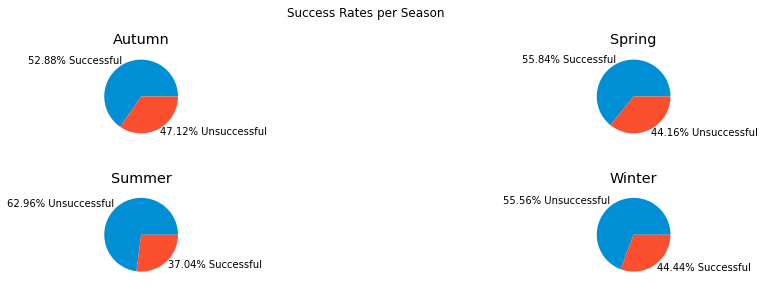

In [ ]:
plt.suptitle("Success Rates per Season", y = 1.05, x = 1)

plt.subplot(2,2,1)
plt.pie([autumn_climbs, autumn_success], labels = Alabels)
plt.title("Autumn")

plt.subplot(2,2,2)
plt.pie([spring_climbs, spring_success], labels = Slabels)
plt.title("Spring")

plt.subplot(2,2,3)
plt.pie([summer_climbs, summer_success], labels = Sulabels)
plt.title("Summer")

plt.subplot(2,2,4)
plt.pie([winter_climbs, winter_success], labels = Wlabels)
plt.title("Winter")

plt.subplots_adjust(left = 0.1,bottom = 0.1, right= 2, top = 0.9, wspace =.5, hspace =.5)

*This visualization shows us that Autumn and Spring are the better seasons to go on an expedition. They both have a 50+% success rate compared to summer and winter, with less than a 45% success rate. A possible reason for this is because winter is more disaster likely, so blizzards and colder weather are prominent. As for summer, since the temperature is pretty warmer or possibly warmer, it could lead to higher chances for avalanches. However, in this case, if I want to climb a mountain in the Himalayans, I should go in either spring or autumn!*

---
---
### 3.2 Project Update 3

#### First Visualization

###### **Did member deaths increase/decrease if there were hired staff on the expedition?**

In [ ]:
staff_and_deaths = expeditions.groupby("hired_staff").sum()[["members", "member_deaths"]]

Text(0, 0.5, 'Member Death')

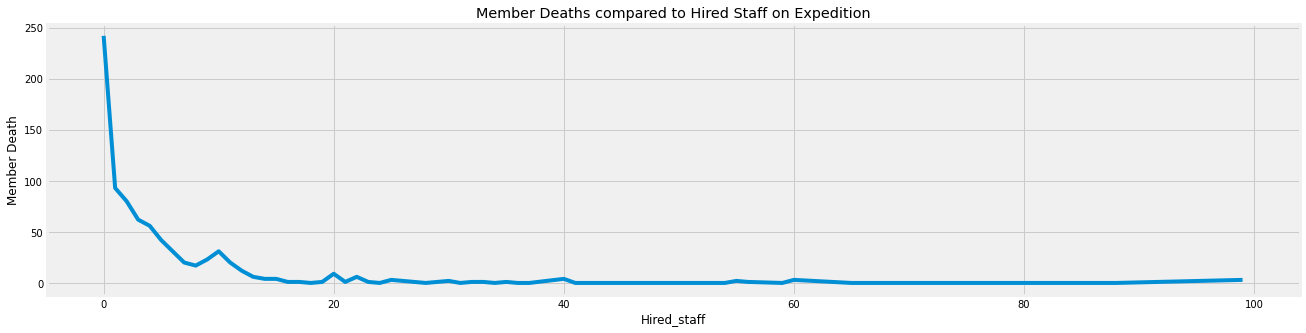

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(staff_and_deaths.index, staff_and_deaths["member_deaths"])
plt.title("Member Deaths compared to Hired Staff on Expedition")
plt.xlabel("Hired_staff")
plt.ylabel("Member Death")

*This visualization shows that the more staff on the expedition, the fewer member deaths. This realization shows that it is beneficial to have staff on an expedition; the more, the better. So anywhere between 18-40 for a reasonably large group and having around ten staff members will be beneficial for a smaller group. Simply having one staff member is more beneficial than zero.*

#### Second Visualization

###### **What peak had the highest sucess rate?**

In [ ]:
success = expeditions[expeditions["termination_reason"] == "Success (main peak)"]

In [ ]:
success_climbs = success.groupby("peak_name").count()[["peak_id"]].rename(columns = {"peak_id" : "successful climbs"})
success_climbs = success_climbs.sort_values("successful climbs")
success_climbs = success_climbs[success_climbs["successful climbs"] > 7]
success_climbs

,successful climbs
peak_name,
Lobuje East,8
Langshisa Ri,8
Annapurna I East,8
Gyajikang,8
Gangapurna,9
Lhotse Shar,9
Kusum Kanguru,9
Changtse,9
Tashi Kang,9


In [ ]:
total_climbs = expeditions.groupby("peak_name").count()[["peak_id"]].rename(columns = {"peak_id" : "Total climbs"})
total_climbs = total_climbs.sort_values("Total climbs")
total_climbs = total_climbs[total_climbs["Total climbs"] > 7]
total_climbs

,Total climbs
peak_name,
Roc Noir,8
Arniko Chuli,8
Ngojumba Kang I,8
Ganesh III,8
Churen Himal Central,8
...,...
Lhotse,429
Manaslu,632
Cho Oyu,1332


In [ ]:
peak_rate = (success_climbs["successful climbs"] / total_climbs["Total climbs"]).to_frame()
peak_rate = peak_rate.sort_values(0, ascending = False)
peak_rate = peak_rate.rename(columns = { 0 : "Success Rate"})
peak_rate = peak_rate[peak_rate["Success Rate"] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0, 0.5, 'Success Rate')

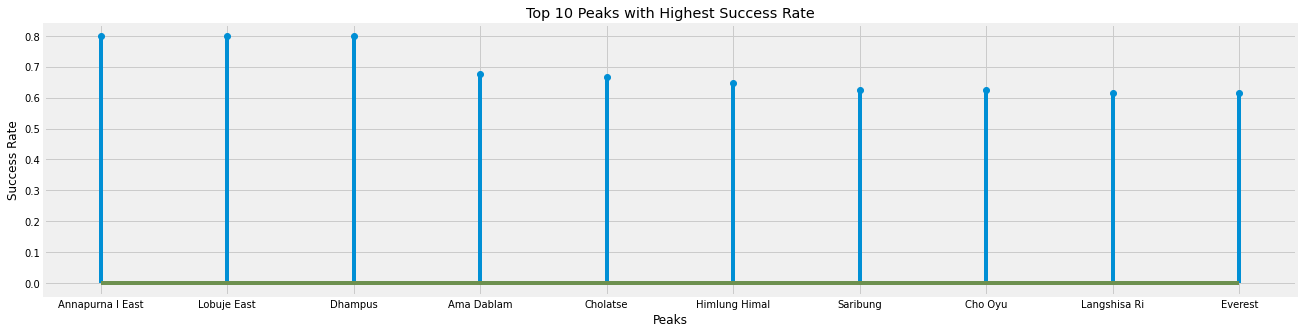

In [ ]:
plt.figure(figsize = (20, 5))
plt.stem(peak_rate.head(10).index, peak_rate["Success Rate"].head(10))
plt.title("Top 10 Peaks with Highest Success Rate")
plt.xlabel("Peaks")
plt.ylabel("Success Rate")

*This visualization shows the top 10 peaks with the highest success rate. I am surprised that Everest is not higher on the list, but it is still good to know it is on this list. It would be wise for a new climber to climb either Annapurna East, Laboje East, or Dhampus since they have one of the highest success rates.*

#### Third Visualization

###### **What peak had the lowest sucess rate?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0, 0.5, 'Success Rate')

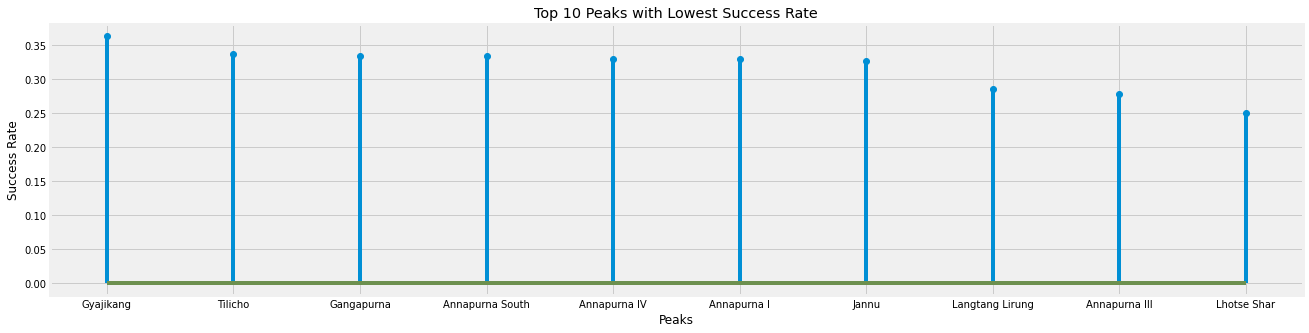

In [ ]:
plt.figure(figsize = (20, 5))
plt.stem(peak_rate.tail(10).index, peak_rate["Success Rate"].tail(10))
plt.title("Top 10 Peaks with Lowest Success Rate")
plt.xlabel("Peaks")
plt.ylabel("Success Rate")

*This visualization shows the peaks with the lowest success rate. It would not be wise for a new climber to climb on one of these peaks!*

#### Fourth Visualization

##### **Were there more member deaths if the number of members on an expedition was higher/lower?**


In [ ]:
#i decided to look into this by year rather than each individual group
member_deaths = expeditions[['year', 'members', 'member_deaths']].copy()
death_occurs = member_deaths[member_deaths['member_deaths'] > 0] #look at if there was a death
death_occurs = death_occurs.groupby('year', as_index=False).sum() #count the num deaths per year

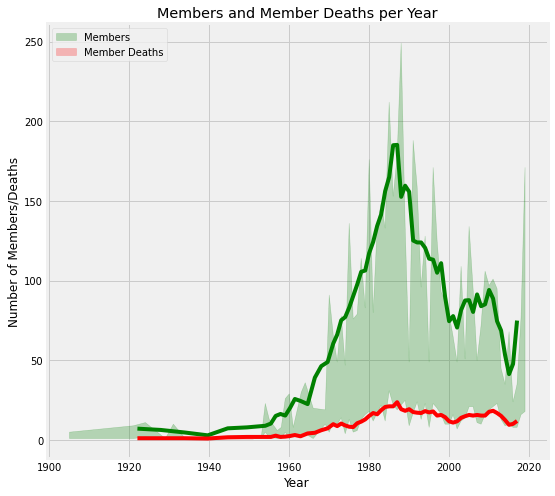

In [ ]:
#Create Area Chart
fig, ax = plt.subplots(figsize=(8, 8))

#plot members per year and deaths per year, taking rolling average for a smoother graph
ax.plot(death_occurs.year.rolling(5).mean(), death_occurs.members.rolling(5).mean(), color="green")
ax.plot(death_occurs.year.rolling(5).mean(), death_occurs.member_deaths.rolling(5).mean(), color="red")

#fill area between the lines (case 1)
ax.fill_between(
    death_occurs.year, death_occurs.members, death_occurs.member_deaths, where=(death_occurs.members > death_occurs.member_deaths), 
    interpolate=True, color="green", alpha=0.25, 
    label="Members"
)

#fill area between lines (case 2)
ax.fill_between(
death_occurs.year, death_occurs.members, death_occurs.member_deaths, where=(death_occurs.members <= death_occurs.member_deaths), 
    interpolate=True, color="red", alpha=0.25,
    label="Member Deaths"
)

#label figure
ax.set_title("Members and Member Deaths per Year")
ax.set_xlabel('Year')
ax.set_ylabel("Number of Members/Deaths")
ax.legend(loc=2);

In [ ]:
#what is this one year - 249 climbers in 1988
death_occurs[death_occurs.year == 1988]

,year,members,member_deaths
37,1988,249,22


*So, it looks like there might be a slight trend, but quite unlikely. We need to see the proportions of these to account for*

In [ ]:
death_occurs.sort_values('members', ascending=False).head(15)

,year,members,member_deaths
37,1988,249,22
34,1985,212,31
40,1991,188,17
36,1987,178,19
29,1980,176,18
45,1996,171,23
68,2019,171,18
41,1992,159,24
35,1986,153,22
32,1983,149,22


In [ ]:
#create a ratio
death_occurs['ratio'] = death_occurs.member_deaths / death_occurs.members
#death_occurs = death_occurs[death_occurs.ratio < 1] #look at ratios less than 1-1
death_occurs.sort_values('ratio', ascending=False).head(15)

,year,members,member_deaths,ratio
3,1929,1,1,1.000000
5,1934,1,1,1.000000
6,1951,1,1,1.000000
18,1969,19,10,0.526316
7,1953,2,1,0.500000
14,1961,8,3,0.375000
65,2016,24,8,0.333333
62,2013,45,13,0.288889
53,2004,51,14,0.274510
63,2014,35,9,0.257143


*It seems that those with a higher ratio of deaths have a varying range of people hiking that year. Out of the top 15, 10 of the years had over 20 hikers. However, none of the top 15 groups of highest member counts (100-250 climbers) were included in the highest ratios list. There probably were other circumstances involved in a higher number of people hiking and member deaths.*

---
---
### 3.2 Project Update 4

#### First Visualization

##### **Is there correlation between height of peak and climbing status?**

Text(0, 0.5, 'Peak Height')

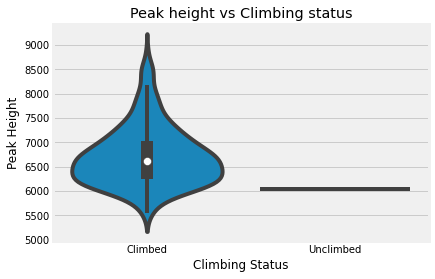

In [ ]:
sns.violinplot(x = peaks["climbing_status"], y = peaks["height_metres"])
plt.title("Peak height vs Climbing status")
plt.xlabel("Climbing Status")
plt.ylabel("Peak Height")

In [ ]:
peaks[peaks["climbing_status"] == "Unclimbed"]

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
455,LANY,Langtang Yubra,Yubra Himal,6048,Unclimbed,2018.0,"Australia, Netherands, Nepal",LANY18301


In [ ]:
expeditions[expeditions["peak_id"] == "LANY"]

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
10129,LANY18301,LANY,Langtang Yubra,2018,Autumn,2018-10-15,2018-10-21,2018-10-24,Success (main peak),6048.0,11,0,5,0,True,Highland Excursions


*This visualization shows us that a majority of the peaks that were climbed were around 6000 - 7000 meters. This could show, that this hieght is the prime hieght to aim for when going on an expedidtion. There is one peak that has not been climbed and that is Langtang Yubra which is at a hiehgt of 6048 meters. This is odd considering it is at a height that expeditioners are normally climbing. So, when we dug deeper, it turns out that the peak was infact sucessfully climbed meaning there is an error in the peaks data.*

---
#### Second Visualization

###### **Which countries had the highest success rate?**

In [ ]:
success_per_country = members[members["success"] == True].groupby("citizenship").count()[["success"]]
success_per_country

,success
citizenship,
Albania,6
Algeria,1
Andorra,7
Argentina,54
Argentina/Canada,2
...,...
Venezuela,15
Venezuela/Spain,1
Vietnam,3


In [ ]:
success_per_country["total"] = members.groupby("citizenship").count()[["member_id"]]
success_per_country

,success,total
citizenship,,
Albania,6,6
Algeria,1,2
Andorra,7,31
Argentina,54,236
Argentina/Canada,2,2
...,...,...
Venezuela,15,46
Venezuela/Spain,1,1
Vietnam,3,5


In [ ]:
success_per_country["success rate"] = success_per_country["success"] / success_per_country["total"]

In [ ]:
success_per_country = success_per_country.sort_values("success rate", ascending = False)
success_per_country = success_per_country[success_per_country["success rate"] != 1]
success_per_country = success_per_country.head(10)
success_per_country

,success,total,success rate
citizenship,,,
Kosovo,10,12,0.833333
Malta,12,16,0.750000
UK/Argentina,5,7,0.714286
Ireland/UK,7,10,0.700000
Armenia,2,3,0.666667
UK/New Zealand,2,3,0.666667
Turkey,33,51,0.647059
Macedonia,7,11,0.636364
Nepal,10134,16135,0.628076


Text(0.5, 0, 'Countries')

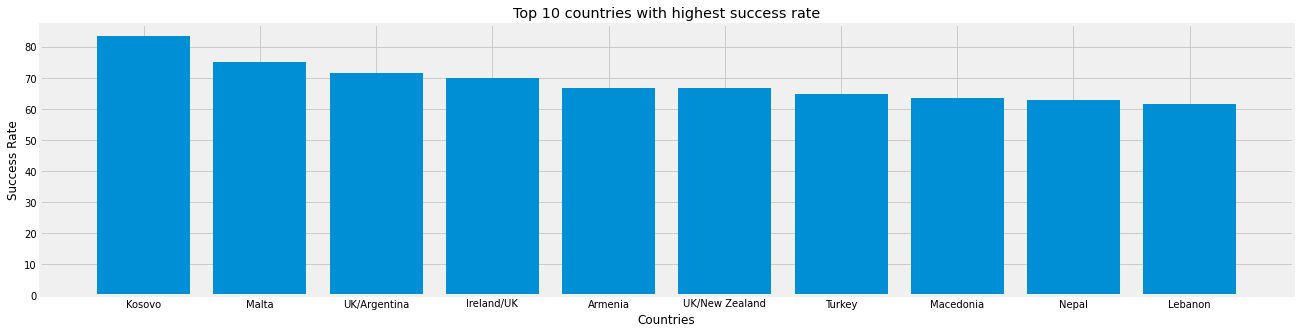

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(success_per_country.index, success_per_country["success rate"] * 100)
plt.title("Top 10 countries with highest success rate")
plt.ylabel("Success Rate")
plt.xlabel("Countries")

*This visualization shows us that the citizens of Kosovo has the highest success rate of833% compared to the rest of the countries. However, Malta is right on its tail with a success rate of  approximately 75%. USA is not in the top 10 with highest success rate which is interesting to learn.*

#### Third Visualization

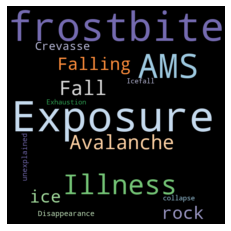

In [ ]:
from wordcloud import WordCloud
# Create list of words
dp = members.injury_type.dropna()
text = ' '.join(dp.tolist())
text = text.replace("(non-AMS)","")

#print(text)

# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, margin=0, collocations=False, colormap='tab20c').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #AMS is altitiude sickness

*Here is a word cloud of the different types of injuries. More prevalent injuries are larger, with more emphasis. In this case, AMS (Altitude sickness) and frostbite/exposure were the top reasons listed for injury types. Runner ups include Illness and avalanches.*

#### Fourth Visualization

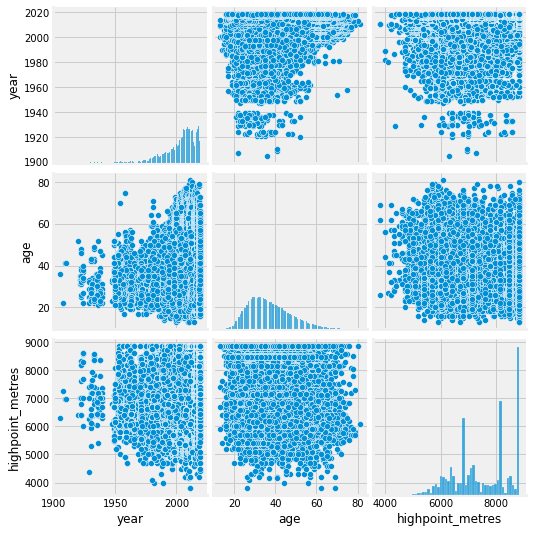

In [ ]:
# library & dataset
import seaborn as sns
#df = sns.load_dataset('iris')
df = members[['year', 'age', 'highpoint_metres']].dropna()

# Basic correlogram
sns.pairplot(df)
plt.show()

*The above graph is a correlogram. A correlogram looks at the relationship between pairs of numeric variables. The correlation is represented with a scatter plot, and the diagonal represents the distribution of that variable. Something interesting with the graph above is that you learn that there is a broader range of ages going on climbing expeditions over the years. But, the distribution of ages still indicates most people on the younger end hiking. For other variables/relationships, the correlation seems the be weak.*

---

## Conclusion

<span style="color:red">This section is not due until the final report.  Make sure you read the Project Description for what is required in this section.</span>

<span style="color:red">NOTE:  For the final report, delete this comment as well as any other red comments that exist in the document.</span>